In [1]:
from transformers import set_seed
from transformers import AutoTokenizer, AutoModel
set_seed(42)
tokenizer = AutoTokenizer.from_pretrained("/share/lilin/chatglm3-6b", trust_remote_code=True)
model = AutoModel.from_pretrained("/share/lilin/chatglm3-6b", trust_remote_code=True, device='cuda')
model = model.eval()
response, history = model.chat(tokenizer, "你好", history=[])
print(response)

response, history = model.chat(tokenizer, "晚上睡不着应该怎么办", history=history)
print(response)


Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

你好👋！我是人工智能助手 ChatGLM3-6B，很高兴见到你，欢迎问我任何问题。
晚上睡不着时，你可以尝试以下方法：

1. 保持冷静：尽量放松，不要焦虑或担心失眠问题。

2. 改变环境：调整房间的温度、光线、声音等，创造一个适宜睡眠的环境。

3. 活动身体：进行一些轻松的活动，如深呼吸、瑜伽、散步等，帮助身体放松，促进入眠。

4. 限制刺激物：避免饮用咖啡、茶、可乐等含有咖啡因的饮料，避免 smoking、喝酒，这些会影响睡眠质量。

5. 规律作息：尽量保持规律的作息时间，每天按时上床睡觉和起床，帮助身体建立良好的作息规律。

6. 放松身心：在睡前进行一些放松活动，如阅读、听音乐等，可以帮助缓解压力，促进入眠。

如果长时间睡不着或睡眠质量不佳，建议咨询医生或专业心理咨询师，获得更好的帮助。


In [2]:
response, history = model.chat(tokenizer, "请介绍一下华为最新的手机产品", history=[], temperature=0.001)
print(response)

华为近期发布的新款手机包括:

1. 华为Mate 40 Pro:该手机搭载了华为自主研发的麒麟9000芯片,拥有8GB/12GB RAM和128GB/256GB/512GB存储容量,配备了6.76英寸的OLED屏幕,分辨率为2772×1224像素,支持90Hz刷新率。此外,该手机还配备了5000mAh电池,支持快速充电和无线充电,并配备了多个摄像头,包括一个50MP主摄像头、一个20MP超广角镜头和一个12MP长焦镜头。

2. 华为nova 8 Pro:该手机搭载了麒麟9000芯片,拥有8GB/12GB RAM和128GB/256GB存储容量,配备了6.57英寸的OLED屏幕,分辨率为2340×1080像素,支持90Hz刷新率。此外,该手机还配备了4500mAh电池,支持快速充电和无线充电,并配备了一个16MP前置摄像头和多个后置摄像头,包括一个64MP主摄像头、一个12MP超广角镜头和一个8MP长焦镜头。

3. 华为P40 Pro:该手机搭载了麒麟9000芯片,拥有8GB/12GB RAM和128GB/256GB/512GB存储容量,配备了6.58英寸的OLED屏幕,分辨率为2772×1224像素,支持90Hz刷新率。此外,该手机还配备了4500mAh电池,支持快速充电和无线充电,并配备了一个40MP前置摄像头和多个后置摄像头,包括一个50MP主摄像头、一个12MP超广角镜头和一个10MP长焦镜头。

以上是华为近期发布的一些新款手机,它们都搭载了麒麟9000芯片,并配备了多个摄像头和出色的屏幕。


In [14]:
import json
import sys

folder = '/share/lilin/ReAct/prompts/'
prompt_file = 'prompts_naive.json'
with open(folder + prompt_file, 'r') as f:
    prompt_dict = json.load(f)

webthink_examples = prompt_dict['webthink_simple6']
instruction = """Solve a question answering task with interleaving Thought, Action, Observation steps. Thought can reason about the current situation, and Action can be three types: 
(1) 搜索[entity], which searches the exact entity on Wikipedia and returns the first paragraph if it exists. If not, it will return some similar entities to search.
(2) 查找[keyword], which returns the next sentence containing keyword in the current passage.
(3) 完成[answer], which returns the answer and finishes the task.
Here are some examples.
"""
# webthink_prompt = instruction + webthink_examples

# webthink_example_s_list = webthink_examples.strip().split("\nQuestion:")
# webthink_example_s = webthink_example_s_list[0] + webthink_example_s_list[1] + webthink_example_s_list[2]
# webthink_prompt_s = instruction + webthink_example_s

In [71]:
instruction = """Solve a question answering task with interleaving Thought, Action, Observation steps. Thought can reason about the current situation, and Action can be three types: 
(1) 搜索[entity], which searches the exact entity on Wikipedia and returns the first paragraph if it exists. If not, it will return some similar entities to search.
(2) 查找[keyword], which returns the next sentence containing keyword in the current passage.
(3) 完成[answer], which returns the answer and finishes the task.
Here are some examples.
"""

instruction_ch = """使用多轮的<Thought, Action, Observation>的步骤范式来回答之后的问题。Thought进行推理分析为了回答任务你需要执行的操作，以及是否已经可以回答任务；Action提炼你需要执行的操作，他有三种模式：
(1) 搜索[关键词]：从网络上搜索关键词并且返回第一个搜索结果的内容；
(2) 查找[关键词]：从网络上搜索关键词并且返回第一个搜索结果的内容；
(3) 完成[最终回答]：生成最终的回答。
下面是一些例子：
"""


example_ch = """
例1：
Question: 科罗拉多造山带东段延伸到的地区的海拔范围是多少？
Thoughts: 我需要搜索科罗拉多造山带，找到科罗拉多造山带东段延伸到的区域，然后找到该区域的海拔范围。
Action: 搜索[科罗拉多造山运动]
Observation: 科罗拉多造山运动是科罗拉多州及其周边地区造山运动的一个阶段。
Thoughts: 它没有提到东部地区。所以我需要看看东部地区。
Action: 查找[东区]
Observation: （结果1/1）东段延伸到高平原，称为中原造山运动。
Thoughts: 科罗拉多造山运动的东部延伸到高平原。所以我需要搜索高平原，找到它的海拔范围。
Action: 搜索[高地]
Observation: 高平原是指两个不同的陆地区域之一: 
Thoughts: 我需要搜索高平原（美国）。
Action: 搜索[高平原（美国）]
Observation: 高平原是大平原的一个子区域。从东到西，高平原的海拔从1800到7000英尺（550到2130米）。[3]
Thoughts: 高平原的海拔从1800英尺到7000英尺左右，所以答案是1800到7000英尺。
Action: 完成[1800至7000英尺]

例2：
Question: 音乐家兼讽刺作家Allie Goertz写了一首关于《辛普森一家》中角色Milhouse的歌，Matt Groening以谁的名字命名了Milhouse？
Thoughts: 这个Question简化为《辛普森一家》中的角色米尔豪斯是以谁的名字命名的。我只需要搜索米尔豪斯并找到它的名字。
Action: 搜索[Milhouse]
Observation: 米尔豪斯·墨索里尼·范·豪滕是福克斯动画电视剧《辛普森一家》中的一个反复出现的角色，由帕梅拉·海登配音，马特·格罗宁创作。
Thoughts: 这段话没有告诉米尔豪斯是以谁的名字命名的，也许我可以查一下“以谁的名义命名”。
Action: 查找[命名]
Observation: （结果1/1）米尔豪斯是以美国总统理查德·尼克松的名字命名的，他的中间名是米尔豪斯。
Thoughts: 米尔豪斯是以美国总统理查德·尼克松的名字命名的，所以答案是理查德·尼克松。
Action: 完成[理查德·尼克松]

例3：
Question: 哪部纪录片是关于芬兰摇滚团体的，Adam Clayton Powell还是The Saimaa Gesture？
Thoughts: 我需要搜索Adam Clayton Powell和The Saimaa Gesture，找到哪部纪录片是关于芬兰摇滚团体的。
Action: 搜索[Adam Clayton Powell]
Observation: 找不到[Adam Clayton Powell]。类似: [《亚当·克莱顿·鲍威尔三世》、《第七大道（曼哈顿）》、《小亚当·克莱顿·鲍威尔国家办公楼》、《伊莎贝尔·华盛顿·鲍威尔》、《亚当·鲍威尔》、“亚当·克莱顿·鲍威尔（电影）”、《吉安卡洛·埃斯波西托》]。
Thoughts: 要找到纪录片，我可以搜索Adam Clayton Powell（电影）。
Action: 搜索[Adam Clayton Powell（电影）]
Observation: 亚当·克莱顿·鲍威尔是一部1989年的美国纪录片，由理查德·基尔伯格执导。这部电影讲述了有影响力的非裔美国政治家小亚当·克莱顿·鲍威尔的兴衰。[3][4]后来作为PBS电视剧《美国经历》的一部分播出。
Thoughts: Adam Clayton Powell（电影）是一部关于非裔美国政治家的纪录片，而不是芬兰摇滚团体。因此，关于芬兰摇滚团体的纪录片必须是The Saimaa Gesture。
Action: 完成[The Saimaa Gesture]

上面是一些例子，下面的回答中，一定不要涉及其中的具体内容，只要效仿上面的格式和思考方法。
注意：每次回答只需要输出一条Thought信息和一条Action信息，当你觉得内容够生成输出了，就做个总结，并且在Action中使用标识符“完成”。

"""
# 注意：
# 1. Thought中的格式：你的想法；
# 2. Action中的格式：一定是搜索, 查找, 回答之一加上[（对象）]；
prompt_ch = instruction_ch + example_ch

In [38]:
def search_ddgs(keyword):
    from duckduckgo_search import DDGS
    content = DDGS().text(keyword, region="cn-zh", max_results=1).__next__()

    print("+"*15, "ddgs搜索结果", "+"*15)
    print(content['title'])
    print("+"*40)

    return content['body'], False
    
def finish(answer):
    return answer, True


In [2]:
search_ddgs("傅里叶变换")

+++++++++++++++ ddgs搜索结果 +++++++++++++++
傅里叶变换 - 维基百科，自由的百科全书
++++++++++++++++++++++++++++++++++++++++


('[1] 经过傅里叶变换生成的函数 称作原函数 的傅里叶变换，应用意义上称作 频谱 。 在特定情況下，傅里叶变换是可逆的，即将 通过逆变换可以得到其原函数 。 通常情况下， 是一个 实函数 ，而 则是一个 复数 值函数，其函数值作为复数可同时表示 振幅 和 相位 。 高斯函数 是傅里叶变换的 本征函数 。 定义 一般情况下，若「傅里叶变换」一词不加任何限定语，则指的是「连续傅里叶变换」（连续函数的傅里叶变换）。 定义傅里叶变换有许多不同的方式。 本文中采用如下的定义：（连续）傅里叶变换将 可积 函数 表示成复指数函数的积分形式或级数形式。 ， 为任意 实数 。 的定义域为频域。 若约定自变量 表示 时间 （以秒为单位），变换变量 表示 频率 （以 赫兹 为单位）。',
 False)

In [90]:
def webthink_single_round_multi_agents(question=None, inst_prompt=prompt_ch, to_print=True):
    if to_print:
        print("Question: ", question)
    prompt = "Question: " + question
    n_calls, n_badcalls = 0, 0
    inner_history = [{'role':'system', 'content':inst_prompt}]
    for i in range(3):
        n_calls += 1
        # thought_action = llm(prompt + f"Thought {i}:", stop=[f"\nObservation {i}:"])
        response, inner_history = model.chat(tokenizer, prompt + "Thought: ", history=inner_history, temperature=0.001)
        print(i, "="*15, "LLM输出结果", "="*15)
        print(f"Thought: ", response)
        print("="*40)
        try:
            # thought, action = thought_action.strip().split(f"\nAction {i}: ")
            thought, action = response.strip().split(f"\nAction:")
        except:
            print('回答格式出错1', response)
            n_badcalls += 1
            n_calls += 1
            thought = response.strip().split('\n')[0]
            # action = llm(prompt + f"Thought {i}: {thought}\nAction {i}:", stop=[f"\n"]).strip()
            response, inner_history = model.chat(tokenizer, prompt + f"Thought {i}: {thought}\nAction {i}: ", history=inner_history, temperature=0.001)
            action = response.strip()

        if("搜索" in action):
            obs, done = search_ddgs(action.strip().split("搜索")[1].strip(" []（）()"))
        elif("查找" in action):
            obs, done = search_ddgs(action.strip().split("查找")[1].strip(" []（）()"))
        elif("完成" in action):
            obs, done = finish(action.strip().split("回答")[1].strip(" []（）()"))
        else:
            break

        # obs, r, done, info = step(env, action[0].lower() + action[1:])
        obs = obs.replace('\\n', '')
        inner_history.append({'role':'observation', 'content':obs})
        # obs_prompt = f"Observation: {obs}\n"
        # prompt += step_str
        # print("#"*20, len(obs_prompt))
        if to_print:
            print(f"Observation: {obs}\n")
        if done:
            print("DDOONNEE")
            r = obs
            break
        prompt = 'Thought: '
        # history = history1
    
    _, h_raw = model.chat(tokenizer, question, history=[], temperature=0.001)
    h_raw[0]['content'] = "只使用llm思考这个问题的答案是："
    inner_history += h_raw
    r, _ = model.chat(tokenizer, f"总结上面搜索到的内容和llm思考的内容，回答问题：{question}", history=inner_history[1:], temperature=0.001)

        # 总结
    # if not done:
    #     obs, r, done, info = step(env, "finish[]")
    # if to_print:
    #     print(info, '\n')
    # info.update({'n_calls': n_calls, 'n_badcalls': n_badcalls, 'traj': prompt})
    return r

In [91]:
query = "请介绍一下华为最新款的手机"
# 
# response, history = model.chat(tokenizer, prompt_ch + query + "\nThought 1: ", history=history, temperature=0.001)
r = webthink_single_round_multi_agents(query)
print(r)

Question:  请介绍一下华为最新款的手机
0 =============== LLM输出结果 ===============
Thought:  Thought: 华为最新款的手机可能是华为Mate 50。我将搜索有关华为Mate 50的信息。
Action: 搜索[华为Mate 50]
+++++++++++++++ ddgs搜索结果 +++++++++++++++
HUAWEI Mate 50 - 华为官网
++++++++++++++++++++++++++++++++++++++++
Observation: HUAWEI Mate 50 搭载全新华为 XMAGE 超光变影像系统，超大光圈，夜景眼前一亮；物理光圈十挡可调，亚毫米级人像虚化。 XMAGE 影像风格献上真实、沁润、通透、有呼吸感的影像。 首款支持北斗卫星消息的华为手机，地面无信号时仍能发送卫星消息，安心畅连。 华为昆仑玻璃，坚若磐石；鸿蒙操作系统 3.0，持久流畅，个性高效，隐私安全再升级。 HUAWEI Mate 50 - 华为官网 HUAWEI Mate 50 我们使用cookie来确保您的高速浏览体验。 继续浏览本站，即表示您同意我们使用cookie。 详情 消费者业务网站 关闭 个人用户 手机，PC和平板，穿戴设备等个人及家用产品 集团网站 公司信息，社会责任，新闻，展会活动，行业洞察等等 企业用户

1 =============== LLM输出结果 ===============
Thought:  Thought: 华为Mate 50 具有强大的影像系统和鸿蒙操作系统，是一款非常先进的手机。
回答格式出错1 Thought: 华为Mate 50 具有强大的影像系统和鸿蒙操作系统，是一款非常先进的手机。
+++++++++++++++ ddgs搜索结果 +++++++++++++++
华为Mate50的1个致命缺点和6个值得购买的理由总结 - 知乎
++++++++++++++++++++++++++++++++++++++++
Observation: 而"HUAWEI Mate 50"采用的全新"昆仑玻璃"可以大幅提升屏幕的耐摔能力，降低了屏幕碎裂的几率，一定程度就避免了昂贵的维修费。 是不是很值？ 所以我把它作为第二个购买理由。 但要注意搭配昆仑玻璃的配置比普通款贵20

In [84]:
def webthink_multi_rounds_single_agent(question, history, inst_prompt=prompt_ch, to_print=True):
    if to_print:
        print("Question: ", question)
    prompt = "Question: " + question
    # n_calls, n_badcalls = 0, 0
    obs = ""
    inner_history = [{'role':'system', 'content':inst_prompt}] + history
    # n_calls += 1
    # thought_action = llm(prompt + f"Thought {i}:", stop=[f"\nObservation {i}:"])
    response, inner_history = model.chat(tokenizer, prompt + "Thought: ", history=inner_history, temperature=0.001)
    print("="*15, "LLM输出结果", "="*15)
    print(f"Thought: ", response)
    print("="*40)
    try:
        # thought, action = thought_action.strip().split(f"\nAction {i}: ")
        thought, action = response.strip().split(f"\nAction:")
    except:
        print('回答格式出错1', response)
        # n_badcalls += 1
        # n_calls += 1
        thought = response.strip().split('\n')[0]
        # action = llm(prompt + f"Thought {i}: {thought}\nAction {i}:", stop=[f"\n"]).strip()
        response, inner_history = model.chat(tokenizer, prompt + f"Thought: {thought}\nAction: ", history=history, temperature=0.001)
        action = response.strip()

    if("搜索" in action):
        obs, done = search_ddgs(action.strip().split("搜索")[1].strip(" []（）()"))
    elif("查找" in action):
        obs, done = search_ddgs(action.strip().split("查找")[1].strip(" []（）()"))
    else:
        r, h  = model.chat(tokenizer, question, history=history, temperature=0.001)
        return r, h

    # obs, r, done, info = step(env, action[0].lower() + action[1:])
    obs = obs.replace('\\n', '')
    inner_history.append({'role':'observation', 'content':obs})

    step_str = f"Thought {i}: {thought}\nAction {i}: {action}\nObservation {i}: {obs}\n"
    # prompt += step_str
    # print("#"*20, len(prompt))
    if to_print:
        print(f"Observation: {obs}\n")
    if done:
        print("DDOONNEE")
        r = obs

    _, h_raw = model.chat(tokenizer, question, history=[], temperature=0.001)
    h_raw[0]['content'] = "只使用llm思考这个问题的答案是："
    inner_history += h_raw

    summary_prompt = "参考以下的搜索结果回答问题：\n"
    r, h = model.chat(tokenizer, f"总结上面搜索到的内容和llm思考的内容，回答问题： {question}", history=inner_history, temperature=0.001)
    # if not done:
    #     obs, r, done, info = step(env, "finish[]")
    # if to_print:
    #     print(info, '\n')
    # info.update({'n_calls': n_calls, 'n_badcalls': n_badcalls, 'traj': prompt})
    return r, h

In [58]:
a = [1]
a.insert(0,2)

In [87]:
# h = [{'role':'system', 'content':prompt_ch}]
h = []
for i in range(5):
    q = input()
    r, h = webthink_multi_rounds_single_agent(q, h)
    print(i, "@"*30)
    print(f"question: {q}\nresponse: {r}\n")

Question:  你好
=============== LLM输出结果 ===============
Thought:  Thought: 你好，请问有什么我可以帮助你的吗？
回答格式出错1 Thought: 你好，请问有什么我可以帮助你的吗？
0 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
question: 你好
response: Thought: 你好，请问有什么我可以帮助你的吗？

Question:  请介绍一下华为最新款手机
=============== LLM输出结果 ===============
Thought:  Thought: 很抱歉，由于我是一个语言模型，我无法获取到2023年之后的信息，因此我无法为您提供华为最新款手机的信息。
回答格式出错1 Thought: 很抱歉，由于我是一个语言模型，我无法获取到2023年之后的信息，因此我无法为您提供华为最新款手机的信息。
1 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
question: 请介绍一下华为最新款手机
response: Thought: 很抱歉，由于我是一个语言模型，我无法获取到2023年之后的信息，因此我无法为您提供华为最新款手机的信息。
Action: 
华为最新款手机是华为Mate 50，它于2022年9月20日正式发布。它采用了6.77英寸的OLED环绕屏，分辨率为2772 x 1224像素，刷新率高达90Hz。它搭载了华为自主研发的麒麟9000处理器，配备了一套由5000万像素主摄、2000万像素超广角和1200万像素长焦组成的四摄像头系统。此外，它还支持5G网络和华为鸿蒙操作系统。

Question:  
=============== LLM输出结果 ===============
Thought:  Thought: 您好，请问有什么我可以帮助您的吗？
回答格式出错1 Thought: 您好，请问有什么我可以帮助您的吗？
2 @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
question: 
response: 您好，有什么我可以帮助您的吗？

Question:  
=============== LLM输出结果 ===============
Thought:  Thought: 您好，请问有什么我

In [47]:
[print(i) for i in h]

{'role': 'system', 'content': '使用多轮的<Thought, Action, Observation>的步骤范式来回答之后的问题。Thought进行推理分析为了完成任务你需要执行的操作，以及是否已经可以完成任务；Action提炼你需要执行的操作，他有三种模式：\n(1) 搜索[关键词]：从网络上搜索关键词并且返回第一个搜索结果的内容；\n(2) 查找[关键词]：从网络上搜索关键词并且返回第一个搜索结果的内容；\n(3) 完成[最终回答]：生成最终的回答。\n下面是一些例子：\n\n例1：\nQuestion: 科罗拉多造山带东段延伸到的地区的海拔范围是多少？\nThoughts: 我需要搜索科罗拉多造山带，找到科罗拉多造山带东段延伸到的区域，然后找到该区域的海拔范围。\nAction: 搜索[科罗拉多造山运动]\nObservation: 科罗拉多造山运动是科罗拉多州及其周边地区造山运动的一个阶段。\nThoughts: 它没有提到东部地区。所以我需要看看东部地区。\nAction: 查找[东区]\nObservation: （结果1/1）东段延伸到高平原，称为中原造山运动。\nThoughts: 科罗拉多造山运动的东部延伸到高平原。所以我需要搜索高平原，找到它的海拔范围。\nAction: 搜索[高地]\nObservation: 高平原是指两个不同的陆地区域之一: \nThoughts: 我需要搜索高平原（美国）。\nAction: 搜索[高平原（美国）]\nObservation: 高平原是大平原的一个子区域。从东到西，高平原的海拔从1800到7000英尺（550到2130米）。[3]\nThoughts: 高平原的海拔从1800英尺到7000英尺左右，所以答案是1800到7000英尺。\nAction: 完成[1800至7000英尺]\n\n例2：\nQuestion: 音乐家兼讽刺作家Allie Goertz写了一首关于《辛普森一家》中角色Milhouse的歌，Matt Groening以谁的名字命名了Milhouse？\nThoughts: 这个Question简化为《辛普森一家》中的角色米尔豪斯是以谁的名字命名的。我只需要搜索米尔豪斯并找到它的名字。\nAction: 搜索[Milhouse]\nObservation: 

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [6]:
h = []
for i in range(5):
    q = input()
    r, h = webthink_multi_rounds_single_agent(q, h):
    print(i, "="*30)
    print(f"question: {q}\nresponse: {r}\n")

SyntaxError: invalid syntax (4264216756.py, line 4)

In [93]:
search_result = "Observation 2: Wendy Schaal (born July 2, 1954)[1] is an American actress known for her work in Joe Dante films such as Innerspace, The 'Burbs, and Small Soldiers. Her other film credits include starring in films such as Where the Boys Are '84, Creature, Going Under, and Munchies. She had many guest roles in television series of the mid-1980s, most notably as Marilyn Kelsy in Airwolf. Since 2005 she has primarily worked in voice acting, most notably voicing Francine Smith in the animated comedy television series American Dad!. Schaal was born in Chicago, Illinois, the daughter of Lois Schaal (née Treacy) and actor Richard Schaal.[1] Schaal's father was married to actress Valerie Harper from 1964 to 1978, during which time Harper was her stepmother.[2] From birth until she was five, Schaal lived with her parents in Crete, Illinois, at which time she moved with her mother to Newport Beach, California after her parents divorced.[3] Schaal studied acting with Viola Spolin in Chicago when she was nine years old, later moving to Wisconsin and then California when she was 11.\n\nThought 3: "
response, history = model.chat(tokenizer, search_result, history=history)
print(response)

Thought 4: Schaal has worked in several films and television series throughout her career, including Innerspace, The 'Burbs, and Creature, and has provided voiceover services for American Dad!

Action 1: 搜索[Wendy Schaal的电影作品]


In [11]:
history

[{'role': 'user',
  'content': 'Solve a question answering task with interleaving Thought, Action, Observation steps. Thought can reason about the current situation, and Action can be three types: \n(1) Search[entity], which searches the exact entity on Wikipedia and returns the first paragraph if it exists. If not, it will return some similar entities to search.\n(2) Lookup[keyword], which returns the next sentence containing keyword in the current passage.\n(3) Finish[answer], which returns the answer and finishes the task.\nHere are some examples.\nQuestion: What is the elevation range for the area that the eastern sector of the Colorado orogeny extends into?\nThought 1: I need to search Colorado orogeny, find the area that the eastern sector of the Colorado orogeny extends into, then find the elevation range of the area.\nAction 1: Search[Colorado orogeny]\nObservation 1: The Colorado orogeny was an episode of mountain building (an orogeny) in Colorado and surrounding areas.\nThoug

In [4]:
search_result = "Observation 1: Wendy Schaal (born July 2, 1954)[1] is an American actress known for her work in Joe Dante films such as Innerspace, The 'Burbs, and Small Soldiers. Her other film credits include starring in films such as Where the Boys Are '84, Creature, Going Under, and Munchies. She had many guest roles in television series of the mid-1980s, most notably as Marilyn Kelsy in Airwolf. Since 2005 she has primarily worked in voice acting, most notably voicing Francine Smith in the animated comedy television series American Dad!. Schaal was born in Chicago, Illinois, the daughter of Lois Schaal (née Treacy) and actor Richard Schaal.[1] Schaal's father was married to actress Valerie Harper from 1964 to 1978, during which time Harper was her stepmother.[2] From birth until she was five, Schaal lived with her parents in Crete, Illinois, at which time she moved with her mother to Newport Beach, California after her parents divorced.[3] Schaal studied acting with Viola Spolin in Chicago when she was nine years old, later moving to Wisconsin and then California when she was 11.\n\nThought 2: "
input = webthink_prompt + query + "\nThought 2: " + response + search_result
len(input)

7744

In [2]:
response, history = model.chat(tokenizer, "北京海淀区今天的空气质量怎么样", history=history)
print(response)

抱歉，作为一个基于文本的人工智能助手，我无法实时获取北京海淀区的空气质量信息。您可以访问天气网站或使用手机应用来获取实时空气质量数据。


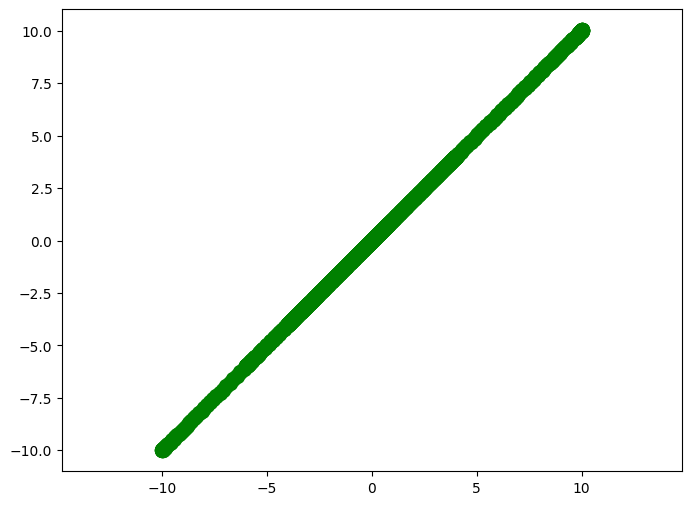

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 参数方程
def leaf_curve(t):
    x = 4 * np.sin(t)**3
    y = 2 * np.cos(t) - 3 * np.cos(2*t) - 4 * np.cos(3*t) - 5 * np.cos(4*t)
    return x, y

# 生成t值列表
t_values = np.linspace(0, 2 * np.pi, 1000)

# 绘制四叶草形状
plt.figure(figsize=(8, 6))
plt.scatter(leaf_curve(t_values), leaf_curve(t_values), color='green', s=100)

plt.axis('equal')  # 确保图形在不同的方向上都有相同的刻度间隔
plt.show()